## Prediction using Supervised ML
### *Linear Regression with Python Scikit Learn Library*

### Prediction of percentage of a student based on the number of study hours.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Abhilasha Ojha

In [143]:
#importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
#"%matplotlib inline" sets the backend of matplotlib to the 'inline' backend.

In [131]:
# Reading the dataset 
student=pd.read_csv("student_scores.csv")
print("Data imported successfully!!")
student.head(13)

Data imported successfully!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [132]:
student.tail(12)

,Hours,Scores
13,3.3,42
14,1.1,17
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35


In [187]:
# Getting the dimensionality of the DataFrame in form of Tuple
student.shape

(25, 2)

Generating Descriptive Statistics just to get th good idea of the dataset.

In [185]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for null values in the data.

In [184]:
student.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

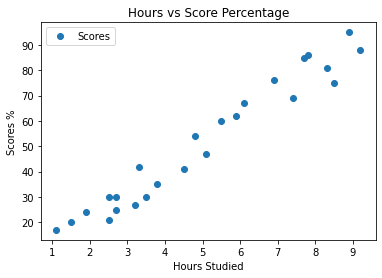

In [183]:
# Plotting the distribution of scores
student.plot(x="Hours",y="Scores",style='o')
plt.title('Hours vs Score Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Scores %')
plt.show()

**From the graph, we can understand that there is a positive relation between Hours studied and Percentage score.**

### **Preparing the Data**

The next step is to slice/split the data into "Attributes(Inputs)" and "Labels(Output)"

In [172]:
X=student.iloc[:,:-1].values #stores all the values of "Hours" column.
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [173]:
y=student.iloc[:, 1].values #stores all the values of "Scores" column.
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train,y_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


### **Training the Algorithm**

Its time to train our Algorithm!

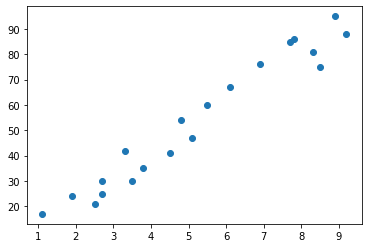

Training Complete!!


In [175]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
plt.scatter(X_train,y_train)
plt.show()

print("Training Complete!!")

We are using Liner Regression because we only have two variables and the dataset is small. The equation for the aforementioned regression is given by: 
$$
y= \Theta x+b\
$$
where y is our target and x feature our input. 

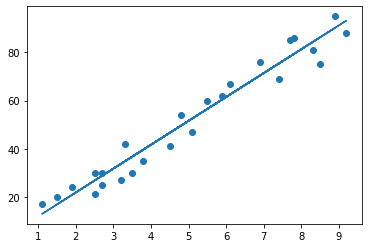

In [176]:
#Plotting the Regression Line

line=regressor.coef_*X + regressor.intercept_

#Plotting for the test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()


### **Making Predictions**

Now that we have trained our algorithm, its time to make some predictions.

In [190]:
print(X_test) #Testing Data -- in Hours
y_pred=regressor.predict(X_test) #Predicting Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [191]:
X_test.shape

(5, 1)

In [188]:
y_test.shape # checking the dimension of y_test -- Clearly it is 2D

(5,)

In [179]:
#Making Dataframes to compare Actual and Predicted Values(Scores)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing the data at hours=9.25 

In [180]:
hours = [[9.25]] # X_test is 2D and so hours must also be 2D.
own_pred = regressor.predict(hours)
print(own_pred)
print("No. of Hours = ",hours[0][0])
print("Predicted Score = ",own_pred[0])

[93.69173249]
No. of Hours =  9.25
Predicted Score =  93.69173248737535


### **Evaluating the Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [181]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

4.183859899002975
